# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.0.1


## Contours

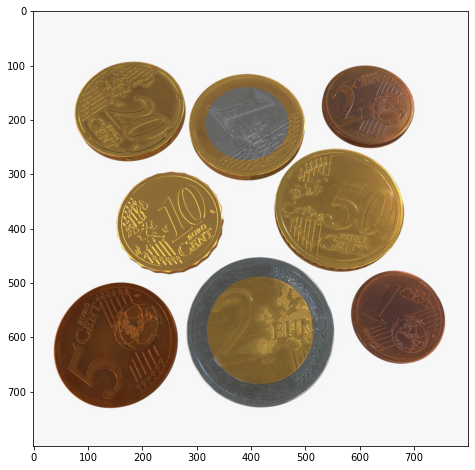

In [3]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

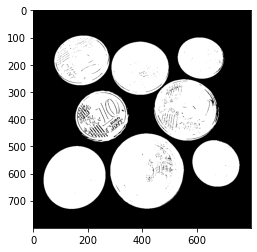

In [4]:
# Convert the image above to grayscale
coins_copy = color_coins.copy()
gray_coins = cv2.cvtColor(coins_copy, cv2.COLOR_BGR2GRAY)

# Apply some gaussian blur to it (try differente size kernels)
blur = cv2.GaussianBlur(gray_coins,(9,9),0)


# Apply Canny to find edges and display the image 
edged = cv2.Canny(blur, 30, 200)



# convert to grayscale


# apply threshold
ret, th = cv2.threshold(gray_coins, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(th, cmap='gray')

In [5]:
def draw_contours(image):
    img = cv2.imread(image)
    
    #convert to grayscale and do some pre-processing
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, th = cv2.threshold(gray_img, 130, 255, cv2.THRESH_BINARY_INV)
    #thresh_Binary_inv is better than thresh_binary --> contours reduced from 400+ to 13
    th = cv2.GaussianBlur(th, (3, 3), 1)
    #print(th)
    #output2 = cv2.Canny(output2, 200, 255) #when canny is not done, a lot inside noise is reduced
    coin_cont, h  = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #print(coin_cont)
    print(type(coin_cont))
    #img_contours = np.zeros(color_coins.shape)
    # draw contours on the copy of the images
    #coin_copy_2 = rgb_coins.copy()

    #cv2.drawContours(coin_copy_2, coin_cont, -1, (0,0,255), 2)
    
draw_contours('img/coins5.jpg')

<class 'list'>


<class 'numpy.ndarray'>


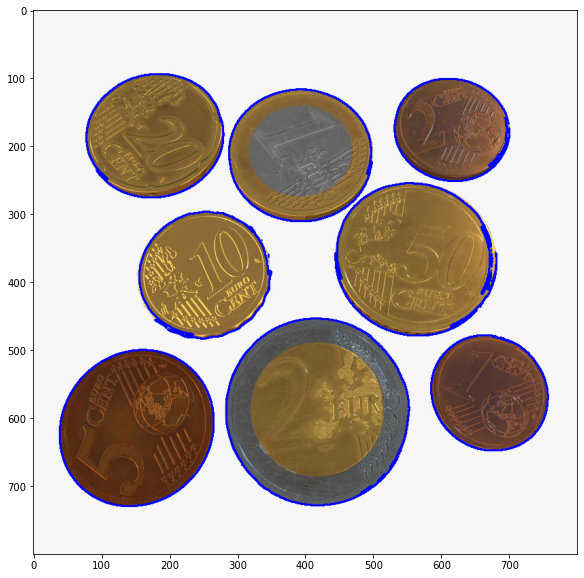

In [7]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
coin_cont, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_contours = np.zeros(color_coins.shape)
# draw contours on the copy of the images
coin_copy_2 = rgb_coins.copy()

cv2.drawContours(coin_copy_2, coin_cont, -1, (0,0,255), 2)
plt.figure(figsize=(10,10))
plt.imshow(coin_copy_2) 
#coin_cont.shape0000
print(type(color_coins))

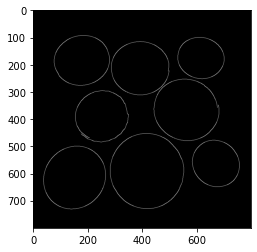

In [18]:
coin_blur = cv2.GaussianBlur(gray_coins, (7,7), 0)

# Apply Canny to find edges and display the image 

coin_canny = cv2.Canny(coin_blur, 100, 400)
plt.imshow(coin_canny, cmap='gray')

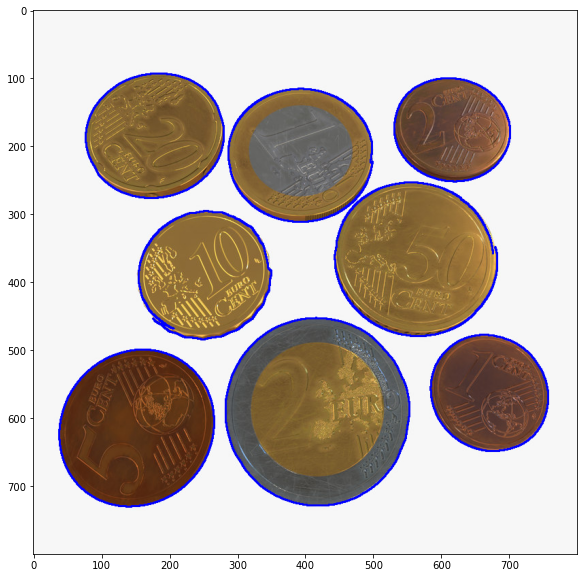

In [20]:
coin_canny_cont, h = cv2.findContours(coin_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


coin_copy_3 = rgb_coins.copy()

cv2.drawContours(coin_copy_3, coin_canny_cont, -1, (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.imshow(coin_copy_3)

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [22]:
# print the number of contours that has been found
print(f'Numbers of contours with threshold: {len(coin_cont)}')
#print(f'Numbers of contours with Canny: {len(canny_cont)}')

Numbers of contours with threshold: 21


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [ ]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise


## Sorting Contours

### By area

In [ ]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [ ]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


In [ ]:
# Print the contour areas to screen


In [ ]:
# Now sort the areas by biggest to smallest and print the sorted areas


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [ ]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas


In [ ]:
# Filter out only the 5 biggest contours and print them


[Hint](# "Just slice the array!") 

In [ ]:
# Now in a clean image draw the contours you just filtered out and display it


In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
